<font size=7> Burst Attempt

In [2]:
from human_hip import spike_data
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

In [3]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

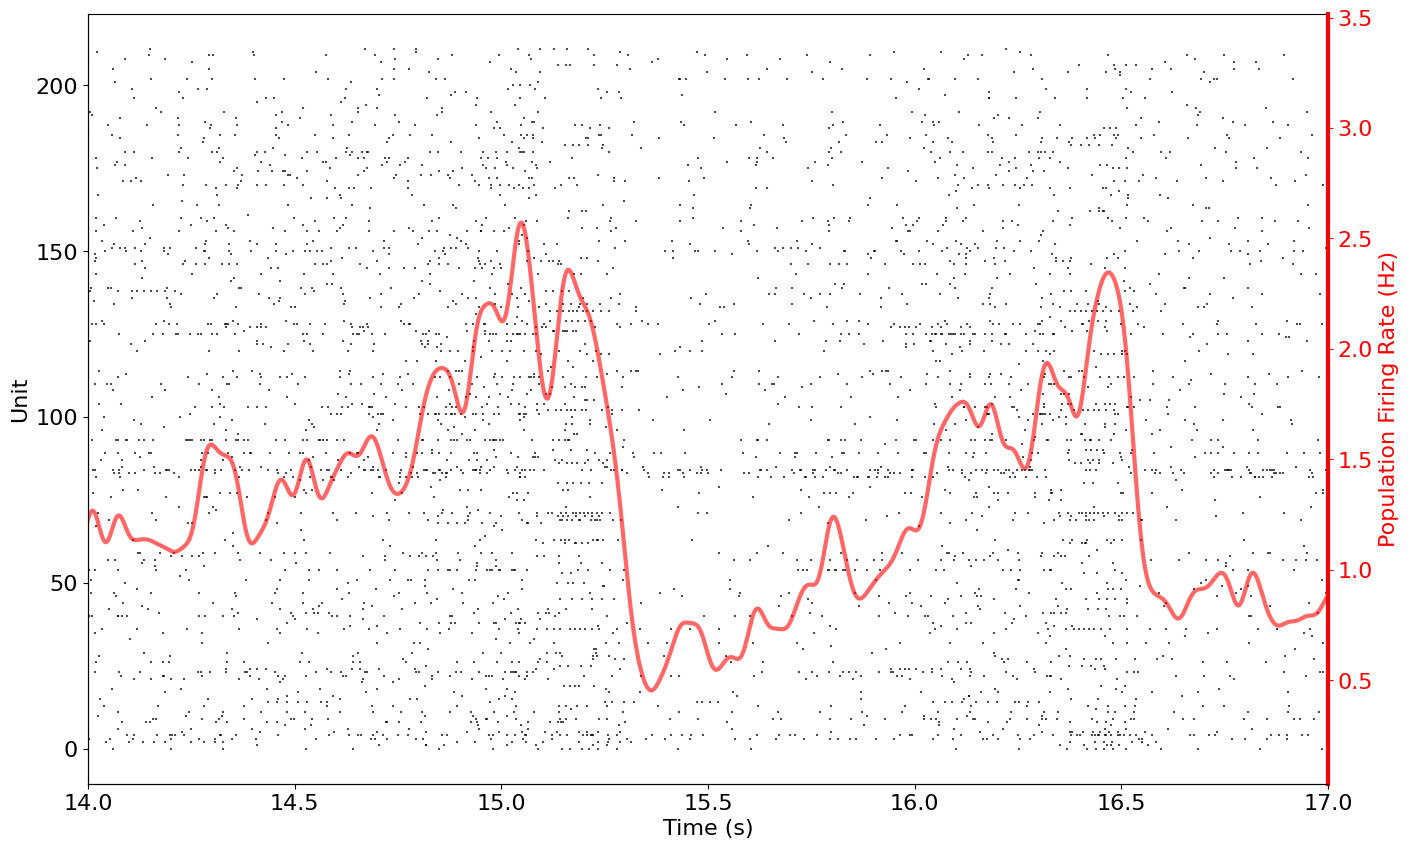

In [4]:
spike_data.plot_raster( sd, size=(16,10), xlim=(14, 17) )

# Setup

In [5]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')
    plt.show()


# Burst comparison

**burst time difference: 0.1699 seconds**

In [6]:
14.855 - 14.685

0.16999999999999993

## Get burst between 14.57-14.75 seconds

In [7]:
sd_start = sd.subtime( 14.57*1000 ,  14.75*1000 )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


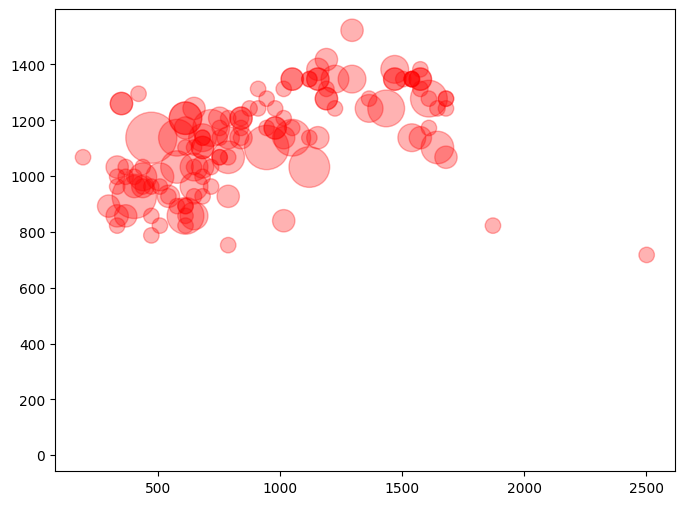

In [8]:
firing_plotter(sd_start)

## Get burst between 14.75-14.95

In [9]:
sd_start = sd.subtime(  14.75*1000, 14.91*1000 )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


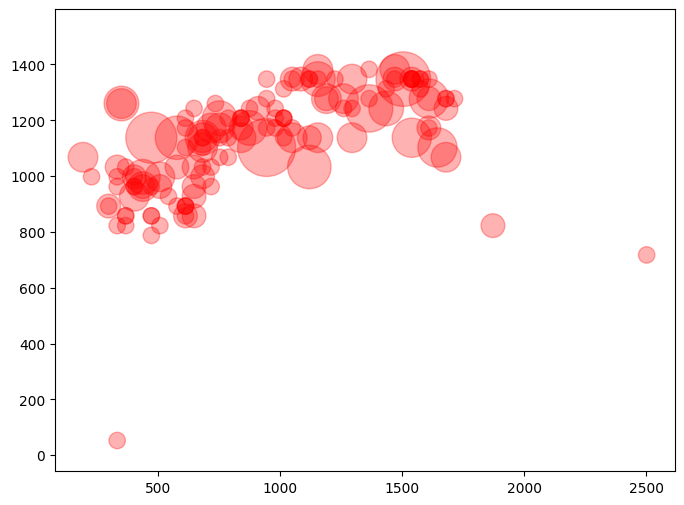

In [10]:
firing_plotter(sd_start)

## subtract plots

In [28]:
sd1 = sd.subtime( 14.57*1000 ,  14.75*1000 )
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(  14.75*1000, 14.91*1000 )
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

/tmp/ipykernel_1059/2601789993.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


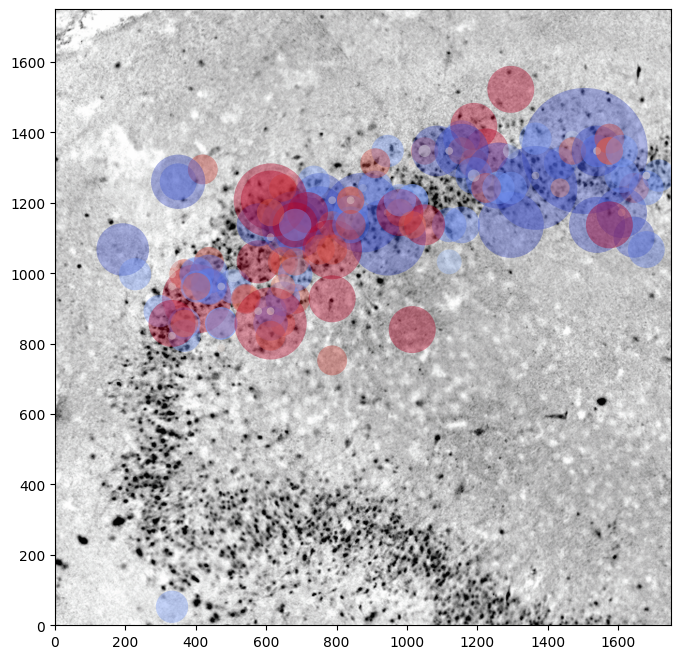

In [33]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 8))
img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.3)*50, alpha=0.4, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.xlim(0,1750)
plt.ylim(0,1750)
# plt.xlim(0,1750)
# plt.ylim(700,1500)
plt.show()

In [ ]:
# img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
# plt.imshow(img,  extent=[0, 3850, 0, 2100])

/tmp/ipykernel_1059/2245385129.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


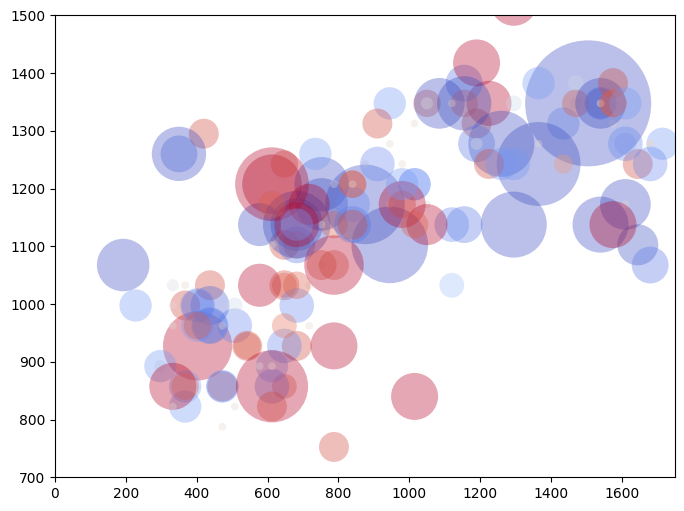

In [12]:
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.3)*50, alpha=0.35, c=firings_diff, edgecolor='none',
                norm=norm, cmap=cm.coolwarm )
    plt.xlim(0,1750)
    plt.ylim(700,1500)
    plt.show()


/tmp/ipykernel_1059/4249673558.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


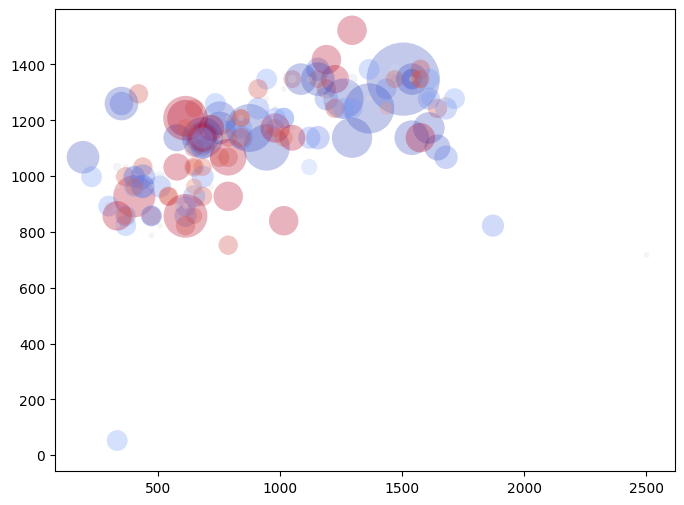

In [13]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.show()


# Peak Trough comparison

## plot peaks and troughs

In [14]:
(14.57+14.685)/2

14.627500000000001

In [15]:
(14.855+14.91)/2

14.8825

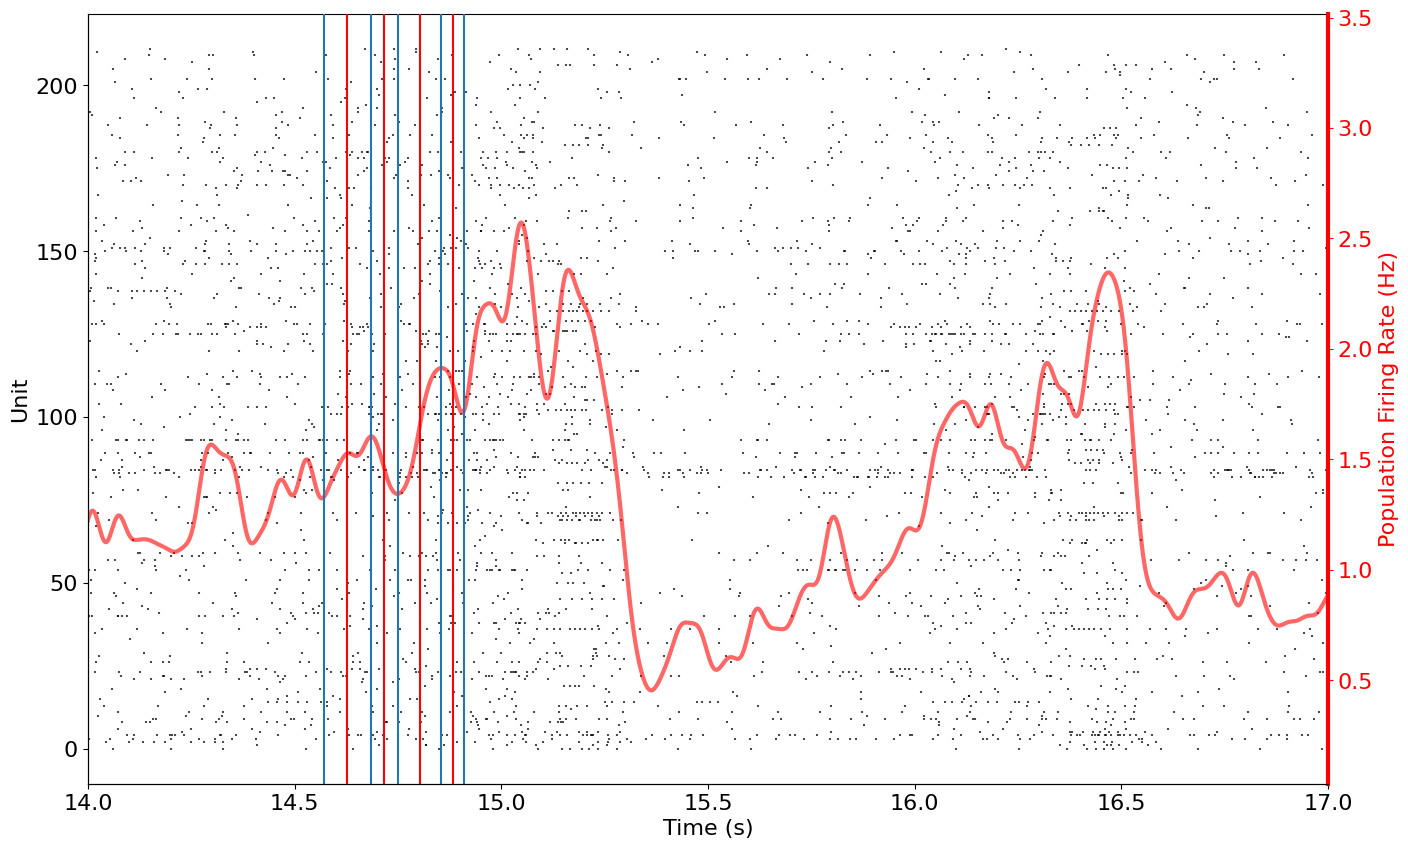

In [16]:
spike_data.plot_raster( sd, size=(16,10), xlim=(14, 17) )

plt.axvline(x=14.57)
plt.axvline(x=14.6275,c="red")
plt.axvline(x=14.685)
plt.axvline(x=14.7175,c="red")
plt.axvline(x=14.75)
plt.axvline(x=14.8025,c="red")
plt.axvline(x=14.855)
plt.axvline(x=14.8825,c="red")
plt.axvline(x=14.91)

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


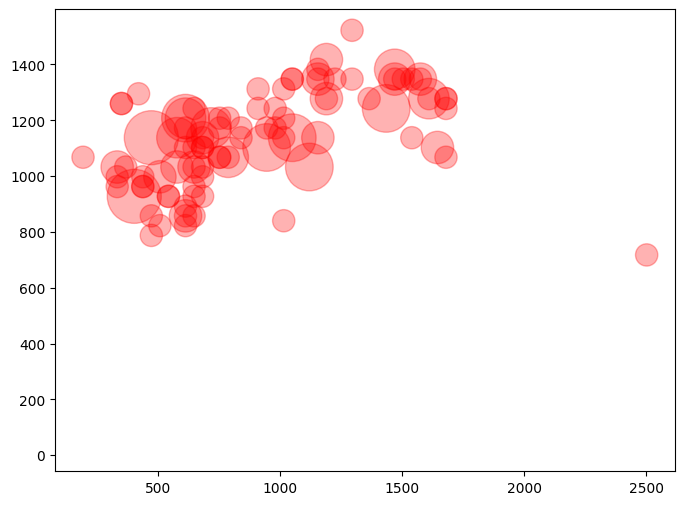

In [17]:
firing_plotter( sd.subtime(14.627*1000, 14.7175*1000) )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


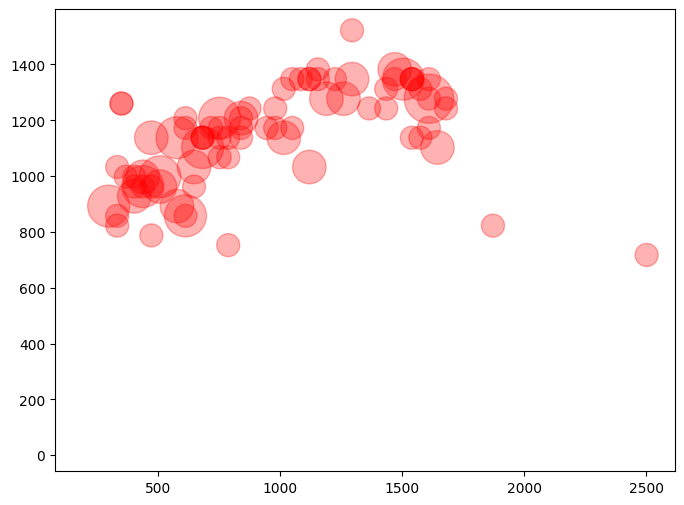

In [18]:
firing_plotter( sd.subtime(14.7175*1000, 14.8025*1000) )

/tmp/ipykernel_1059/2456849553.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


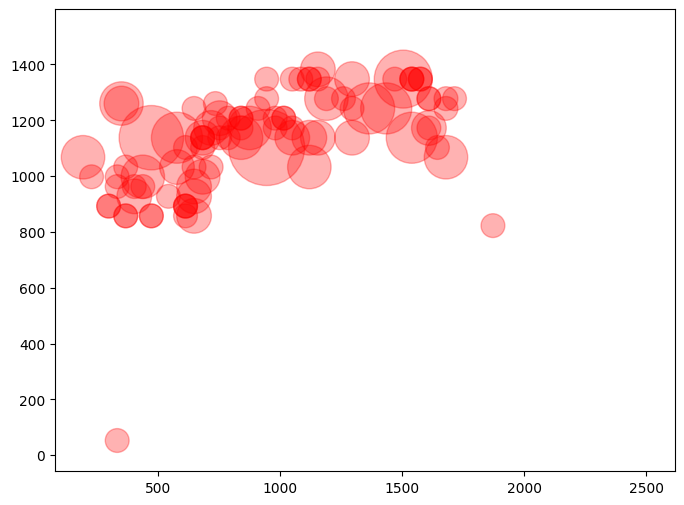

In [19]:
firing_plotter( sd.subtime(14.8025*1000, 14.8825*1000) )

## plot differences

In [24]:
sd1 = sd.subtime(14.627*1000, 14.7175*1000)
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(14.7175*1000, 14.8025*1000)
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

/tmp/ipykernel_1059/3900484821.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


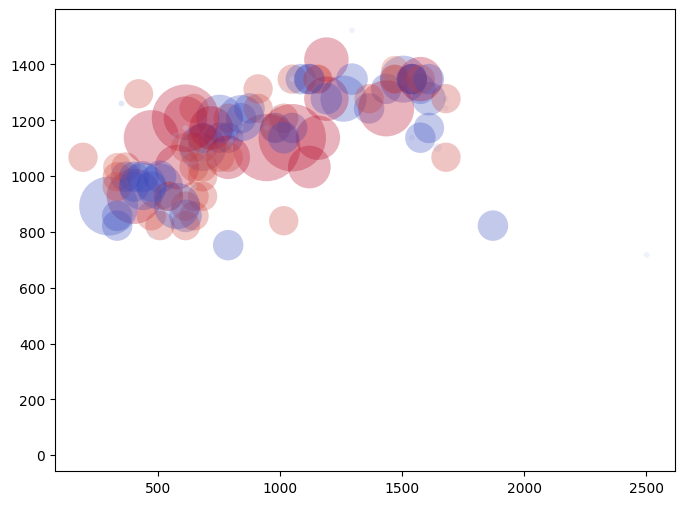

In [25]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
# img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
# plt.imshow(img,  extent=[0, 3850, 0, 2100])
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )
plt.show()


In [26]:
sd1 = sd.subtime(14.7175*1000, 14.8025*1000)
firings_1 = calculate_mean_firing_rates(sd1)

sd2 = sd.subtime(14.8025*1000, 14.8825*1000)
firings_2 = calculate_mean_firing_rates(sd2)

firings_diff =  firings_1-firings_2

/tmp/ipykernel_1059/1301763079.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


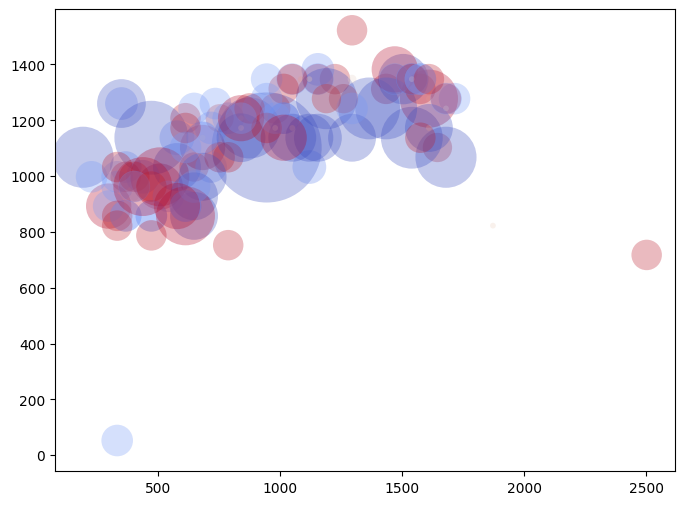

In [27]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
plt.figure(figsize=(8, 6))
plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.2)*25, alpha=0.3, c=firings_diff, edgecolor='none',
            norm=norm, cmap=cm.coolwarm )